<a href="https://colab.research.google.com/github/armandossrecife/teste/blob/main/resultadotccgustavo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importação das bibliotecas e datasets

In [ ]:
import pandas as pd
import datetime
import time
import matplotlib.pyplot as plt
import numpy as np
import PIL 

In [ ]:
!wget https://raw.githubusercontent.com/armandossrecife/teste/main/testesincrono.csv
!wget https://raw.githubusercontent.com/armandossrecife/teste/main/testeassincrono.csv
!wget https://raw.githubusercontent.com/armandossrecife/teste/main/repositoriostcc.csv

--2023-03-17 10:56:05--  https://raw.githubusercontent.com/armandossrecife/teste/main/testesincrono.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2137 (2.1K) [text/plain]
Saving to: ‘testesincrono.csv’

testesincrono.csv   100%[===================>]   2.09K  --.-KB/s    in 0s      

2023-03-17 10:56:05 (40.0 MB/s) - ‘testesincrono.csv’ saved [2137/2137]

--2023-03-17 10:56:06--  https://raw.githubusercontent.com/armandossrecife/teste/main/testeassincrono.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2127 (2.1K) [text/p

# Definição dos dataframes

# Dados originais

In [ ]:
df_sincrono_original = pd.read_csv('testesincrono.csv')
df_assincrono_original = pd.read_csv('testeassincrono.csv')
df_repositorios = pd.read_csv('repositoriostcc.csv')

df_sincrono_original.columns = ['repositorio', 't1', 't2', 't3', 't4', 't5', 'tm']
df_assincrono_original.columns = ['repositorio', 't1', 't2', 't3', 't4', 't5', 'tm']
df_repositorios.columns = ['repositorio', 'tamanho', 'qtd_commits', 'ultimo_commit']

In [ ]:
df_sincrono_original

,repositorio,t1,t2,t3,t4,t5,tm
0,https://github.com/apache/accumulo,0:00:44,0:00:42,0:00:50,0:00:44,0:00:45,0:00:45
1,https://github.com/apache/calcite,0:00:45,0:00:41,0:00:49,0:00:42,0:00:48,0:00:45
2,https://github.com/apache/chukwa,0:00:20,0:00:17,0:00:19,0:00:17,0:00:22,0:00:19
3,https://github.com/apache/cassandra,0:02:54,0:02:49,0:02:35,0:02:41,0:02:58,0:02:47
4,https://github.com/apache/jackrabbit,0:00:31,0:00:14,0:00:30,0:00:30,0:00:29,0:00:27
5,https://github.com/FasterXML/jackson,0:00:12,0:00:09,0:00:14,0:00:10,0:00:12,0:00:11
6,https://github.com/apache/jspwiki,0:00:33,0:00:25,0:00:33,0:00:34,0:00:41,0:00:33
7,https://github.com/square/retrofit,0:00:02,0:00:04,0:00:04,0:00:03,0:00:03,0:00:03
8,https://github.com/apache/struts,0:00:31,0:00:37,0:00:38,0:00:40,0:00:34,0:00:36
9,https://github.com/apache/jena,0:02:54,0:03:00,0:02:41,0:02:53,0:03:26,0:02:59


In [ ]:
df_assincrono_original

,repositorio,t1,t2,t3,t4,t5,tm
0,https://github.com/apache/accumulo,0:04:57,0:01:13,0:03:22,0:03:30,0:06:18,0:03:30
1,https://github.com/apache/calcite,0:04:57,0:13:19,0:03:22,0:03:30,0:01:06,0:03:30
2,https://github.com/apache/chukwa,0:08:03,0:13:19,0:03:22,0:03:30,0:04:50,0:04:50
3,https://github.com/apache/cassandra,0:04:57,0:02:55,0:03:22,0:03:30,0:06:18,0:03:30
4,https://github.com/apache/jackrabbit,0:08:04,0:02:55,0:03:22,0:13:09,0:06:18,0:06:18
5,https://github.com/FasterXML/jackson,0:08:04,0:13:19,0:00:54,0:01:09,0:06:18,0:06:18
6,https://github.com/apache/jspwiki,0:08:04,0:02:55,0:00:59,0:13:09,0:13:58,0:08:04
7,https://github.com/square/retrofit,0:15:08,0:13:19,0:04:51,0:13:09,0:06:18,0:13:09
8,https://github.com/apache/struts,0:15:08,0:01:48,0:03:25,0:13:09,0:06:18,0:06:18
9,https://github.com/apache/jena,0:02:35,0:13:19,0:04:51,0:13:09,0:06:18,0:06:18


In [ ]:
df_repositorios

,repositorio,tamanho,qtd_commits,ultimo_commit
0,https://github.com/apache/accumulo,129,11734,2023-03-07
1,https://github.com/apache/calcite,125,5159,2023-03-03
2,https://github.com/apache/chukwa,85,854,2019-03-31
3,https://github.com/apache/cassandra,487,28415,2023-03-07
4,https://github.com/apache/jackrabbit,121,9082,2023-02-28
5,https://github.com/FasterXML/jackson,33,2048,2023-01-05
6,https://github.com/apache/jspwiki,111,9244,2023-01-04
7,https://github.com/square/retrofit,11,2026,2023-03-07
8,https://github.com/apache/struts,111,6522,2023-03-07
9,https://github.com/apache/jena,559,10584,2023-03-06


## Transformação dos dados

In [ ]:
# tempo 0:00:00
def converte_segundos(tempo):
  x = time.strptime(tempo.split(',')[0],'%H:%M:%S')
  return datetime.timedelta(hours=x.tm_hour,minutes=x.tm_min,seconds=x.tm_sec).total_seconds()

In [ ]:
converte_segundos('1:01:01')

3661.0

In [ ]:
df_sincrono = df_sincrono_original.copy()
df_sincrono['t1'] = df_sincrono['t1'].apply(lambda x: converte_segundos(x))
df_sincrono['t2'] = df_sincrono['t2'].apply(lambda x: converte_segundos(x))
df_sincrono['t3'] = df_sincrono['t3'].apply(lambda x: converte_segundos(x))
df_sincrono['t4'] = df_sincrono['t4'].apply(lambda x: converte_segundos(x))
df_sincrono['t5'] = df_sincrono['t5'].apply(lambda x: converte_segundos(x))
df_sincrono['tm'] = df_sincrono['tm'].apply(lambda x: converte_segundos(x))

df_sincrono = df_sincrono[['repositorio','t1', 't2', 't3', 't4', 't5']]
df_sincrono['mean'] = df_sincrono.mean(axis=1).round(2)
df_sincrono['tamanho'] = df_repositorios['tamanho']
df_sincrono = df_sincrono[['repositorio', 'tamanho','t1', 't2', 't3', 't4', 't5', 'mean']]


df_assincrono = df_assincrono_original.copy()
df_assincrono['t1'] = df_assincrono['t1'].apply(lambda x: converte_segundos(x))
df_assincrono['t2'] = df_assincrono['t2'].apply(lambda x: converte_segundos(x))
df_assincrono['t3'] = df_assincrono['t3'].apply(lambda x: converte_segundos(x))
df_assincrono['t4'] = df_assincrono['t4'].apply(lambda x: converte_segundos(x))
df_assincrono['t5'] = df_assincrono['t5'].apply(lambda x: converte_segundos(x))
df_assincrono['tm'] = df_assincrono['tm'].apply(lambda x: converte_segundos(x))

df_assincrono = df_assincrono[['repositorio','t1', 't2', 't3', 't4', 't5']]
df_assincrono['mean'] = df_assincrono.mean(axis=1)
df_assincrono['tamanho'] = df_repositorios['tamanho']
df_assincrono = df_assincrono[['repositorio','tamanho','t1', 't2', 't3', 't4', 't5', 'mean']]

<ipython-input-42-6469f9f345f4>:10: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_sincrono['mean'] = df_sincrono.mean(axis=1).round(2)
<ipython-input-42-6469f9f345f4>:24: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_assincrono['mean'] = df_assincrono.mean(axis=1)


In [ ]:
df_sincrono = df_sincrono.sort_values(by=['tamanho'])
df_sincrono

,repositorio,tamanho,t1,t2,t3,t4,t5,mean
23,https://github.com/google/gson,11,3.0,3.0,3.0,4.0,3.0,3.2
7,https://github.com/square/retrofit,11,2.0,4.0,4.0,3.0,3.0,3.2
21,https://github.com/apache/mina,21,7.0,6.0,11.0,6.0,7.0,7.4
5,https://github.com/FasterXML/jackson,33,12.0,9.0,14.0,10.0,12.0,11.4
22,https://github.com/alibaba/fastjson,38,6.0,9.0,8.0,8.0,6.0,7.4
11,https://github.com/apache/ant-ivy,47,5.0,6.0,7.0,7.0,5.0,6.0
14,https://github.com/cbeust/testng,48,8.0,16.0,13.0,14.0,12.0,12.6
19,https://github.com/pgjdbc/pgjdbc,54,13.0,18.0,22.0,19.0,18.0,18.0
17,https://github.com/apache/xerces2-j,66,17.0,19.0,19.0,18.0,19.0,18.4
2,https://github.com/apache/chukwa,85,20.0,17.0,19.0,17.0,22.0,19.0


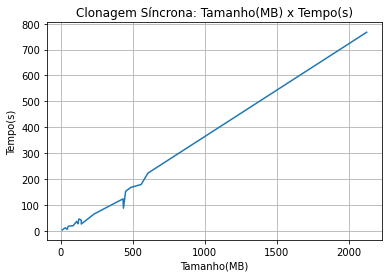

In [ ]:
plt.plot(df_sincrono['tamanho'], df_sincrono['mean'])
plt.title('Clonagem Síncrona: Tamanho(MB) x Tempo(s)')
plt.xlabel('Tamanho(MB)')
plt.ylabel('Tempo(s)')
plt.grid(visible=True)
plt.savefig('curva_sincrono.png')
plt.show()

In [ ]:
df_assincrono = df_assincrono.sort_values(by=['tamanho'])
df_assincrono

,repositorio,tamanho,t1,t2,t3,t4,t5,mean
23,https://github.com/google/gson,11,172.0,208.0,10.0,190.0,9.0,117.8
7,https://github.com/square/retrofit,11,908.0,799.0,291.0,789.0,378.0,633.0
21,https://github.com/apache/mina,21,68.0,208.0,7.0,190.0,51.0,104.8
5,https://github.com/FasterXML/jackson,33,484.0,799.0,54.0,69.0,378.0,356.8
22,https://github.com/alibaba/fastjson,38,172.0,208.0,10.0,190.0,13.0,118.6
11,https://github.com/apache/ant-ivy,47,484.0,799.0,17.0,789.0,838.0,585.4
14,https://github.com/cbeust/testng,48,908.0,799.0,134.0,789.0,119.0,549.8
19,https://github.com/pgjdbc/pgjdbc,54,136.0,41.0,43.0,34.0,152.0,81.2
17,https://github.com/apache/xerces2-j,66,136.0,108.0,134.0,168.0,119.0,133.0
2,https://github.com/apache/chukwa,85,483.0,799.0,202.0,210.0,290.0,396.8


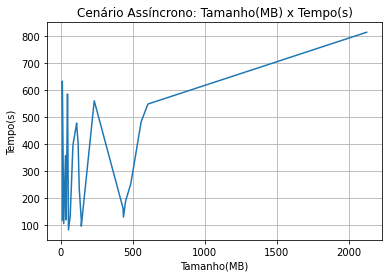

In [ ]:
plt.plot(df_assincrono['tamanho'], df_assincrono['mean'])
plt.title('Cenário Assíncrono: Tamanho(MB) x Tempo(s)')
plt.xlabel('Tamanho(MB)')
plt.ylabel('Tempo(s)')
plt.grid(visible=True)
plt.savefig('curva_assincrono.png')
plt.show()

In [ ]:
im_curva_sincrono = PIL.Image.open('curva_sincrono.png')
im_curva_assincrono = PIL.Image.open('curva_assincrono.png')

<Axes: >

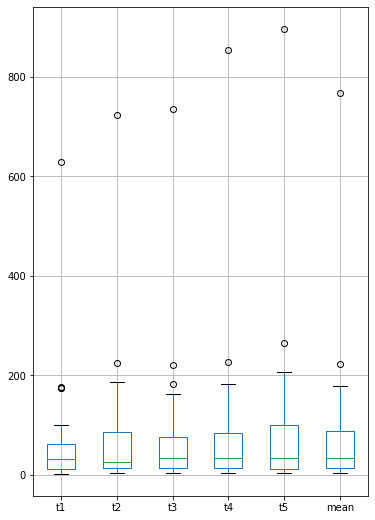

In [ ]:
df_sincrono.boxplot(column=['t1', 't2', 't3', 't4', 't5', 'mean'], figsize=(6, 9), grid=True)

array([[<Axes: title={'center': 'mean'}>]], dtype=object)

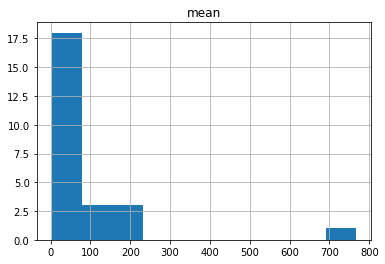

In [ ]:
df_sincrono.hist(column='mean')

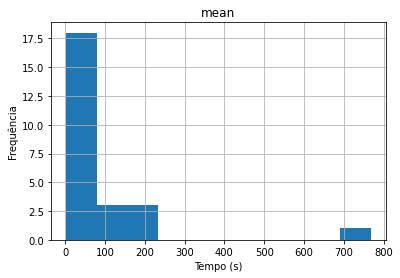

In [ ]:
# Note that you can let the hist function do the groupby
# the function hist returns the list of axes created
axarr = df_sincrono.hist(column='mean',sharex=True, sharey=True)
for ax in axarr.flatten():
    ax.set_xlabel("Tempo (s)")
    ax.set_ylabel("Frequência")

<Axes: >

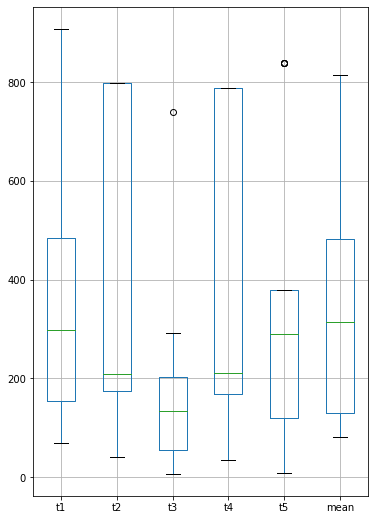

In [ ]:
df_assincrono.boxplot(column=['t1', 't2', 't3', 't4', 't5', 'mean'], figsize=(6,9))

array([[<Axes: title={'center': 'mean'}>]], dtype=object)

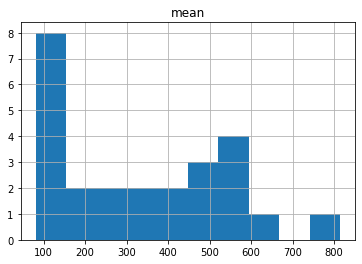

In [ ]:
df_assincrono.hist(column='mean')

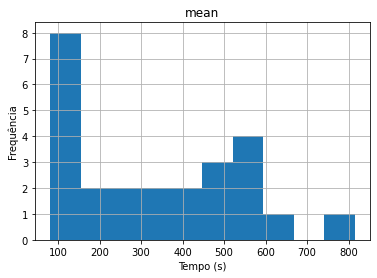

In [ ]:
axarr = df_assincrono.hist(column='mean',sharex=True, sharey=True)
for ax in axarr.flatten():
    ax.set_xlabel("Tempo (s)")
    ax.set_ylabel("Frequência")

# Tempo médio de clonagem individual

## Testes síncronos

In [ ]:
df_sincrono

,repositorio,tamanho,t1,t2,t3,t4,t5,mean
23,https://github.com/google/gson,11,3.0,3.0,3.0,4.0,3.0,3.2
7,https://github.com/square/retrofit,11,2.0,4.0,4.0,3.0,3.0,3.2
21,https://github.com/apache/mina,21,7.0,6.0,11.0,6.0,7.0,7.4
5,https://github.com/FasterXML/jackson,33,12.0,9.0,14.0,10.0,12.0,11.4
22,https://github.com/alibaba/fastjson,38,6.0,9.0,8.0,8.0,6.0,7.4
11,https://github.com/apache/ant-ivy,47,5.0,6.0,7.0,7.0,5.0,6.0
14,https://github.com/cbeust/testng,48,8.0,16.0,13.0,14.0,12.0,12.6
19,https://github.com/pgjdbc/pgjdbc,54,13.0,18.0,22.0,19.0,18.0,18.0
17,https://github.com/apache/xerces2-j,66,17.0,19.0,19.0,18.0,19.0,18.4
2,https://github.com/apache/chukwa,85,20.0,17.0,19.0,17.0,22.0,19.0


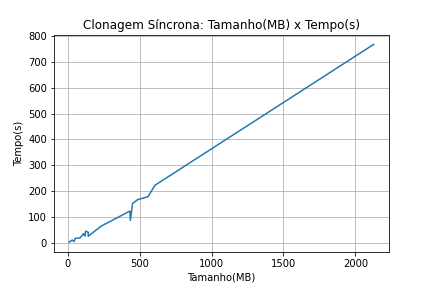

In [ ]:
im_curva_sincrono

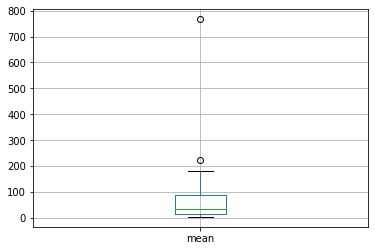

In [ ]:
myFig1 = plt.figure();
bp_sincrono = df_sincrono.boxplot(column=['mean'])
myFig1.savefig("bp_sincrono.png", format="png")

In [ ]:
df_sincrono['mean'].describe().round(2)

count     25.00
mean      84.93
std      155.29
min        3.20
25%       12.60
50%       33.20
75%       87.20
max      767.00
Name: mean, dtype: float64

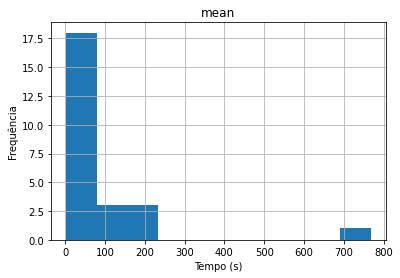

In [ ]:
axarr = df_sincrono.hist(column='mean',sharex=True, sharey=True)
for ax in axarr.flatten():
    ax.set_xlabel("Tempo (s)")
    ax.set_ylabel("Frequência")

In [ ]:
qtd_mean_menor_250s = len(df_sincrono.query("mean<=250"))
qtd_mean_maior_650s = len(df_sincrono.query("mean>650"))

print(f"Qtd de repositórios com média de clonagem MENOR que 250s: {qtd_mean_menor_250s}")
print(f"Qtd de repositórios com média de clonagem MAIOR que 650s: {qtd_mean_maior_650s}")

Qtd de repositórios com média de clonagem MENOR que 250s: 24
Qtd de repositórios com média de clonagem MAIOR que 650s: 1


## Testes assíncronos

In [ ]:
df_assincrono

,repositorio,tamanho,t1,t2,t3,t4,t5,mean
23,https://github.com/google/gson,11,172.0,208.0,10.0,190.0,9.0,117.8
7,https://github.com/square/retrofit,11,908.0,799.0,291.0,789.0,378.0,633.0
21,https://github.com/apache/mina,21,68.0,208.0,7.0,190.0,51.0,104.8
5,https://github.com/FasterXML/jackson,33,484.0,799.0,54.0,69.0,378.0,356.8
22,https://github.com/alibaba/fastjson,38,172.0,208.0,10.0,190.0,13.0,118.6
11,https://github.com/apache/ant-ivy,47,484.0,799.0,17.0,789.0,838.0,585.4
14,https://github.com/cbeust/testng,48,908.0,799.0,134.0,789.0,119.0,549.8
19,https://github.com/pgjdbc/pgjdbc,54,136.0,41.0,43.0,34.0,152.0,81.2
17,https://github.com/apache/xerces2-j,66,136.0,108.0,134.0,168.0,119.0,133.0
2,https://github.com/apache/chukwa,85,483.0,799.0,202.0,210.0,290.0,396.8


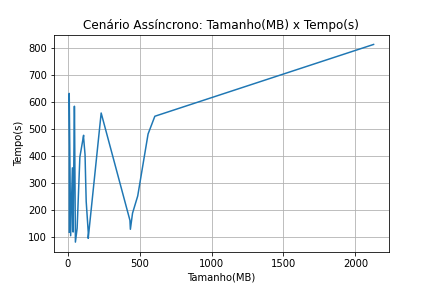

In [ ]:
im_curva_assincrono

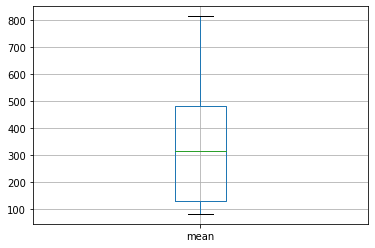

In [ ]:
myFig2 = plt.figure();
bp_assincrono = df_assincrono.boxplot(column=['mean'], figsize=(3,6))
myFig2.savefig("bp_assincrono.png", format="png")

In [ ]:
df_assincrono['mean'].describe().round(2)

count     25.00
mean     333.11
std      210.26
min       81.20
25%      128.80
50%      314.80
75%      482.40
max      814.60
Name: mean, dtype: float64

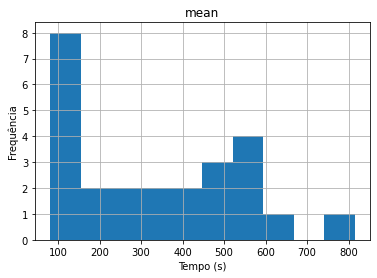

In [ ]:
axarr = df_assincrono.hist(column='mean',sharex=True, sharey=True)
for ax in axarr.flatten():
    ax.set_xlabel("Tempo (s)")
    ax.set_ylabel("Frequência")

In [ ]:
qtd_mean_menor_250s = len(df_assincrono.query("mean<=250"))
qtd_mean_menor_450s = len(df_assincrono.query("mean<=450"))
qtd_mean_menor_600s = len(df_assincrono.query("mean<600"))
qtd_mean_maior_600s = len(df_assincrono.query("mean>600"))

print(f"Qtd de repositórios com média de clonagem MENOR que 250s: {qtd_mean_menor_250s}")
print(f"Qtd de repositórios com média de clonagem MENOR que 450s: {qtd_mean_menor_450s}")
print(f"Qtd de repositórios com média de clonagem MENOR que 600s: {qtd_mean_menor_600s}")
print(f"Qtd de repositórios com média de clonagem MAIOR que 600s: {qtd_mean_maior_600s}")

Qtd de repositórios com média de clonagem MENOR que 250s: 11
Qtd de repositórios com média de clonagem MENOR que 450s: 16
Qtd de repositórios com média de clonagem MENOR que 600s: 23
Qtd de repositórios com média de clonagem MAIOR que 600s: 2
